In [1]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.1'

In [2]:
import os
os.chdir("data/")

import pandas as pd
pd.set_option('display.max_colwidth', -1)
train = pd.read_csv("train.csv")    

In [3]:
_ham = train.loc[train.smishing == 0, "text"]

In [4]:
_ham.head()

0    XXX은행성산XXX팀장입니다.행복한주말되세요                                                                                                                                                      
1    오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림                                                                                                                                         
2    안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니다.감사합니다. 새해 복 많이 받으십시오.XXX은행옥포XXX올림                                                                                             
3    XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 보내주신 성원에 감사드립니다. 설렘으로 시작한 2017년소망하시는 일 모두 이XXX 고객님의 가정에 늘 건강과 행복이 함께하길 기원하겠습니다. 사랑하는 가족과 함께 정을 나누는 행복한 설 명절 보내세요 XXX은행 XXX지점직원일동
4    1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다                                                                                                                                      
Name: text, dtype: object

In [5]:
spam = train.loc[train.smishing == 1, "text"]

spam.head()

9     (광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자격기준과 심사기준이 완화되어 상품에 대해 간단하게 상품정보 전달드립니다.수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신거부 목록에 등록을 시켜 두번 다시 발송되지 않도록 조치를 취해드리겠습니다.신청방법:  XXX-XXX-XXX  터치하셔서 문자로 상담 또는 00시 00분 상담이라고 답장을 보내주시거나 전화를 주시면 친절하고 안전한 상담으로 도움드리겠습니다.카카오톡 상담서비스 시행중 citibankloan친구추가 후 상담신청이런 분들께 권해드립니다.1. 시중은행권에서 기존한도를 모두 사용 중이신 분.2. 기대출의 원리금 균등방식으로 인해 월 불입금액이 부담스러우신 분.3. 총 채무금액은 작으나 채무건수가 많아서 관리가 안 되시는 XXX고객님들께 말씀드립니다. 높은 금리 때문에 힘들다고 느끼셨을 때 대출이 필요하실 때 언제나XXX 고객님들 뒤에서 든든한 파트너로서 도와드리겠습니다.당행 상품특징1. 당행 거래가 없으셔도 진행가능.2. 시중은행권보다 높은 한도.3. 자체 등급으로 판단하므로 낮은신용자도 진행가능.4. 부채가 많다면 부채 통합상품으로 전환가능.5. 원리금 균등방식을 이자만 납입하는 만기일시로 전환가능.6. 가상 조회를 통해 한도 및 금리를 한 번에 확인가능.당행 상품안내1. 직장인전용 신용상품한도: 최대 1억 4000만 원까지.금리: 최저 2.97%자격: XXX은행 자체 등급과 기업 리스트에 따라 차등적용.2. 채무통합 전환상품한도: 연봉 대비 300%까지.금리: 최저 2.97%자격: XXX은행 자체 등급과 기업 리스트에 따라 차등적용.3. 새 희망 홀씨한도: 최대 2500만 원.금리: 8.68%12%자격: 연봉 4000만 원 이하 고객 대상으로 XXX 자체 등급에 따라(광고)XXX                        
23    (광고)XXX추가 XXX품   특판 안내문XXX 지점에서 취급하고 있는 여신 XXX

In [6]:
from konlpy.tag import *

hannanum = Hannanum()

In [7]:
with open ("spam.txt", 'w', encoding='utf-8') as f:
    f.write(spam.to_string(header=False, index = False))

In [8]:
f = open("spam.txt", 'r', encoding='utf-8')
_spam = f.read()

In [9]:
print(_spam[:40])
hannanum.nouns(_spam[:40])

(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로


['광고', '고객님', '뒤엔XXX', '새', '마음가짐']

In [10]:
hannanum.nouns(_spam[:50])

['광고', '고객님', '뒤엔XXX', '새', '마음가짐', '준비']

In [11]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

retokenize = RegexpTokenizer("[^XXX\W0-9]+")
retokenize.tokenize(_spam)

['광고',
 'Ba',
 '고객님들',
 '뒤엔',
 '언제나',
 '새로운',
 '마음가짐으로',
 '새롭게',
 '준비합니다',
 '당행상품의',
 '자격기준과',
 '심사기준이',
 '완화되어',
 '상품에',
 '대해',
 '간단하게',
 '상품정보',
 '전달드립니다',
 '수신을',
 '희망하지',
 '않으실',
 '경우에는',
 '거부',
 '라는',
 '답장을',
 '주시면',
 'KISA',
 '수신거부',
 '목록에',
 '등록을',
 '시켜',
 '두번',
 '다시',
 '발송되지',
 '않도록',
 '조치를',
 '취해드리겠습니다',
 '신청방법',
 '터치하셔서',
 '문자로',
 '상담',
 '또는',
 '시',
 '분',
 '상담이라고',
 '답장을',
 '보내주시거나',
 '전화를',
 '주시면',
 '친절하고',
 '안전한',
 '상담으로',
 '도움드리겠습니다',
 '카카오톡',
 '상담서비스',
 '시행중',
 'citibankloan친구추가',
 '후',
 '상담신청이런',
 '분들께',
 '권해드립니다',
 '시중은행권에서',
 '기존한도를',
 '모두',
 '사용',
 '중이신',
 '분',
 '기대출의',
 '원리금',
 '균등방식으로',
 '인해',
 '월',
 '불입금액이',
 '부담스러우신',
 '분',
 '총',
 '채무금액은',
 '작으나',
 '채무건수가',
 '많아서',
 '관리가',
 '안',
 '되시는',
 '고객님들께',
 '말씀드립니다',
 '높은',
 '금리',
 '때문에',
 '힘들다고',
 '느끼셨을',
 '때',
 '대출이',
 '필요하실',
 '때',
 '언제나',
 '고객님들',
 '뒤에서',
 '든든한',
 '파트너로서',
 '도와드리겠습니다',
 '당행',
 '상품특징',
 '당행',
 '거래가',
 '없으셔도',
 '진행가능',
 '시중은행권보다',
 '높은',
 '한도',
 '자체',
 '등급으로',
 '판단하므로',
 '낮은신용자도',
 '진행가능',
 '부채가',
 '많다면',

In [12]:
tagged_list = pos_tag(retokenize.tokenize(_spam))
tagged_list

[('광고', 'JJ'),
 ('Ba', 'NNP'),
 ('고객님들', 'NNP'),
 ('뒤엔', 'NNP'),
 ('언제나', 'NNP'),
 ('새로운', 'NNP'),
 ('마음가짐으로', 'NNP'),
 ('새롭게', 'NNP'),
 ('준비합니다', 'NNP'),
 ('당행상품의', 'NNP'),
 ('자격기준과', 'NNP'),
 ('심사기준이', 'NNP'),
 ('완화되어', 'NNP'),
 ('상품에', 'NNP'),
 ('대해', 'NNP'),
 ('간단하게', 'NNP'),
 ('상품정보', 'NNP'),
 ('전달드립니다', 'NNP'),
 ('수신을', 'NNP'),
 ('희망하지', 'NNP'),
 ('않으실', 'NNP'),
 ('경우에는', 'NNP'),
 ('거부', 'NNP'),
 ('라는', 'NNP'),
 ('답장을', 'NNP'),
 ('주시면', 'NNP'),
 ('KISA', 'NNP'),
 ('수신거부', 'NNP'),
 ('목록에', 'NNP'),
 ('등록을', 'NNP'),
 ('시켜', 'NNP'),
 ('두번', 'NNP'),
 ('다시', 'NNP'),
 ('발송되지', 'NNP'),
 ('않도록', 'NNP'),
 ('조치를', 'NNP'),
 ('취해드리겠습니다', 'NNP'),
 ('신청방법', 'NNP'),
 ('터치하셔서', 'NNP'),
 ('문자로', 'NNP'),
 ('상담', 'NNP'),
 ('또는', 'NNP'),
 ('시', 'NNP'),
 ('분', 'NNP'),
 ('상담이라고', 'NNP'),
 ('답장을', 'NNP'),
 ('보내주시거나', 'NNP'),
 ('전화를', 'NNP'),
 ('주시면', 'NNP'),
 ('친절하고', 'NNP'),
 ('안전한', 'NNP'),
 ('상담으로', 'NNP'),
 ('도움드리겠습니다', 'NNP'),
 ('카카오톡', 'NNP'),
 ('상담서비스', 'NNP'),
 ('시행중', 'NNP'),
 ('citibankloan친구추

In [13]:
from nltk import Text

text = Text(retokenize.tokenize(_spam))

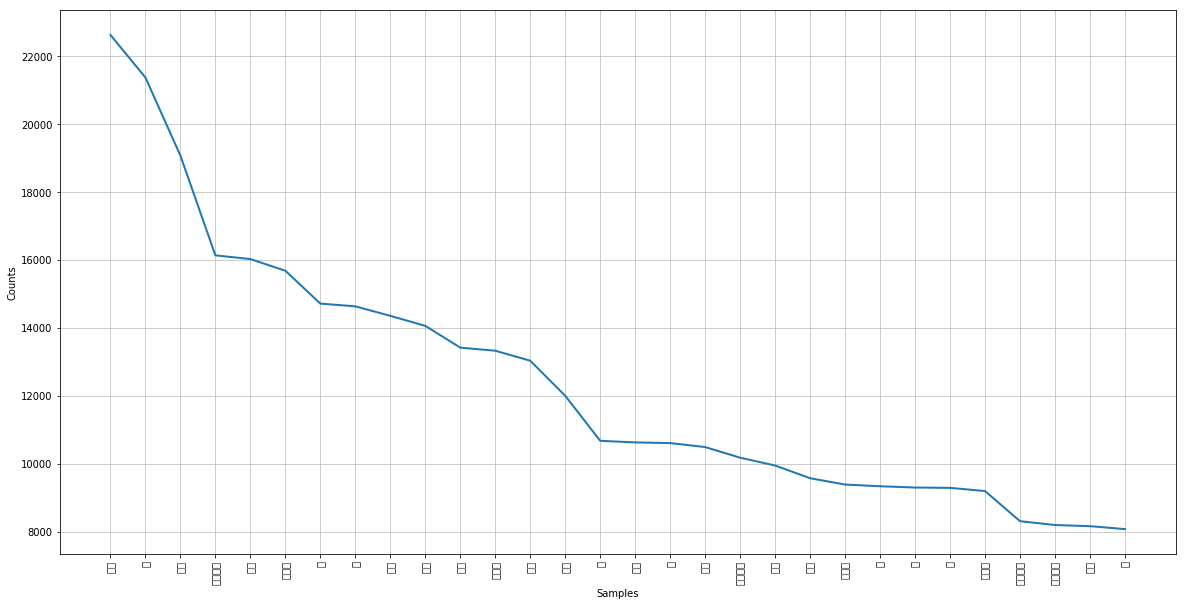

In [14]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(30)

In [15]:
import matplotlib as mpl

print(mpl.__version__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

2.1.0
C:\Users\admin\.matplotlib
C:\Users\admin\.matplotlib


In [16]:
print(mpl.matplotlib_fname())

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [17]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

print(len(font_list))

303


In [18]:
f = [f.name for f in font_manager.fontManager.ttflist]
f[:10]

['STIXSizeOneSym',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'cmtt10',
 'STIXSizeThreeSym',
 'DejaVu Serif Display',
 'cmmi10',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Serif']

In [19]:
[(f.name, f.fname) for f in font_manager.fontManager.ttflist if 'Nanum' in f.name]

[]

In [20]:
print(plt.rcParams['font.family'])

['NanumGothic']


In [21]:
text.count('광고')

22629

In [22]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [23]:
from konlpy.tag import Hannanum

han = Hannanum()

In [24]:
print(han.pos(_spam[:10]))

[('(', 'S'), ('광고', 'N'), (')', 'S'), ('XXXBaX', 'F')]


In [25]:
nouns = han.nouns(_spam)

In [26]:
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)

In [27]:
import Collections import Counter
count = Counter(words)
most = count.most_common(100)

SyntaxError: invalid syntax (<ipython-input-27-4164eb09cc07>, line 1)